In [20]:
from mindee import Client
import json
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math
from IPython.lib.pretty import pretty


In [21]:
mindee_client = Client(
    invoice_token= '<insert api key>',
    raise_on_error=True
)
#get a free api key at platform.mindee.com

Image size: (536, 580)


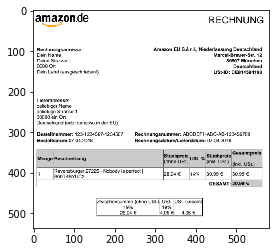

In [22]:
#load image - get height and width - show image
imagepath = 'images/invoice1.png'
image = cv2.imread(imagepath)
#fix colour space
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width, channels = image.shape
print(f"Image size: ({height}, {width})")
plt.imshow(image)
plt.show()

In [23]:
parsed_data = mindee_client.parse_invoice(imagepath)

In [24]:
print(parsed_data.invoice)

-----Invoice data-----
Filename: invoice1.png 
Invoice number: ABCDEF1-ABC-AB-123456789 
Total amount including taxes: 30.99 
Total amount excluding taxes: 26.04 
Invoice date: 2016-04-07
Invoice due date: 2016-04-07
Supplier name: AMAZON.DE
Taxes: 4.95 19.0%
Total taxes: 4.95
----------------------


In [25]:
print(parsed_data.http_response)

{'api_request': {'error': {}, 'resources': ['document'], 'status': 'success', 'status_code': 201, 'url': 'http://api.mindee.net/v1/products/mindee/invoices/v2/predict'}, 'document': {'annotations': {'labels': {}}, 'id': '8bc3ba58-df99-4338-8dc9-caf2641eb64a', 'inference': {'extras': {}, 'finished_at': '2022-01-17T17:28:19+00:00', 'pages': [{'id': 0, 'prediction': {'company_registration': [{'confidence': 0.99, 'polygon': [[0.839, 0.274], [0.968, 0.274], [0.968, 0.296], [0.839, 0.296]], 'type': 'VAT NUMBER', 'value': 'DE814584193'}], 'date': {'confidence': 0.99, 'polygon': [[0.734, 0.588], [0.841, 0.588], [0.841, 0.608], [0.734, 0.608]], 'value': '2016-04-07'}, 'document_type': {'value': 'INVOICE'}, 'due_date': {'confidence': 0.99, 'polygon': [[0.734, 0.588], [0.84, 0.588], [0.84, 0.604], [0.734, 0.604]], 'raw': '2016-04-07', 'value': '2016-04-07'}, 'invoice_number': {'confidence': 0.72, 'polygon': [[0.633, 0.558], [0.924, 0.558], [0.924, 0.58], [0.633, 0.58]], 'value': 'ABCDEF1-ABC-AB-1

In [26]:
print(f"Total excluding amount: {parsed_data.invoice.total_excl.value}")
print(f"Total tax amount: {parsed_data.invoice.total_tax.value}")
print(f"Total including amount: {parsed_data.invoice.total_incl.value}")

Total excluding amount: 26.04
Total tax amount: 4.95
Total including amount: 30.99


In [27]:
# To get the list of taxes
taxes = parsed_data.invoice.taxes

# Loop on each Tax field
#There might be more items, so report them here:
for tax_item in taxes:
    print(f"{tax_item.code} - rate {tax_item.rate / 100:.2%} - amount {tax_item.value:.2f}")


None - rate 19.00% - amount 4.95


In [28]:
print(parsed_data.invoice.invoice_date.value)
print(parsed_data.invoice.due_date.value)

2016-04-07
2016-04-07


In [29]:
print(parsed_data.invoice.supplier.value)


AMAZON.DE


In [30]:
# To get the list of payment details
payment_details = parsed_data.invoice.payment_details

# Loop on each object
for payment_detail in payment_details:
   # To get the IBAN
   iban = payment_detail.iban

   # To get the swift
   swift = payment_detail.swift

   # To get the routing number
   routing_number = payment_detail.routing_number

   # To get the account_number
   account_number = payment_detail.account_number
   print(("IBAN: {iban} \nSwift: {swift} \nRouting number: {routing_number} \nAccount number: {account_number} ").format(iban=iban, swift=swift, routing_number=routing_number, account_number=account_number ))
   

In [31]:
# To get the list of company numbers
company_registration_numbers = parsed_data.invoice.company_number


# Loop on each object
for company_number in company_registration_numbers:
   # To get the type of number
   company_number_type = company_number.type

   # To get the company number
   company_number_value = company_number.value
   print(("{company_number_type} :  {company_number_value}").format(company_number_type=company_number_type,company_number_value=company_number_value))
   

VAT NUMBER :  DE814584193


In [32]:
# To get the total language code
language = parsed_data.invoice.locale.value
print(language)
# To get the invoice currency code
currency = parsed_data.invoice.locale.currency
print(currency)

de
EUR


total_incl - start: (433, 419), end: (532, 436)
total_excl - start: (209, 489), end: (256, 508)
due_date - start: (426, 316), end: (488, 324)
supplier - start: (-1, 8), end: (142, 35)


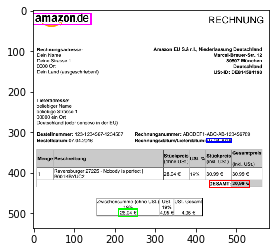

In [38]:
#now display the boxes on the image
data_dump = json.dumps(parsed_data.http_response)
data_json= json.loads(data_dump)
# Change this as you please to add supported fields
fields_of_interest = ["total_incl", "total_excl", "due_date", "supplier"]
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 0, 255)]
for field, color in zip(fields_of_interest, colors):
    poly = data_json['document']['inference']['prediction'][field]['polygon']
    left, top = poly[0]
    right, bot = poly[2]
    # Switch to absolute coordinates
    left, right = math.ceil(left * width), math.ceil(right * width)
    top, bot = math.ceil(top * height), math.ceil(bot * height)
    # Print coords of located fields
    print(f"{field} - start: {(left, top)}, end: {(right, bot)}")
    # Display them on the image
    image = cv2.rectangle(image, (left, top), (right, bot), color, 2)
plt.imshow(image)
plt.show()